# Quantitative Biology and Biophysics (AS.020.674/618)	Spring 2024
# Lab 8: Hilser 
# April 19, 2024

#  Lineweaver-Burk Plot

The goal here will be to perform a linear regression. As mentioned earlier in the semester, a linear regression has an analytical solution, unlike a non-linear fit, which is numerically solved recursively.

## Libraries you will need

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Linear Regression

For a linear regression, you have:

**x: independent data**

**y: dependent data**

You want to build a function:

**y_predict = y_intercept + slope*x**

where the difference between y and y_predict is minimal. The linear algebra involved in doing this operation is called a linear regression.

## Linear Regression in Python

Any easy regression function to use in Python is `LinearRegression.fit(x,y)`

To calculate the slope and y-intercept, execute the code in the following manner:

`reg = LinearRegression().fit(x, y)`

`slope = reg.coef_[0]`

`y_intercept = reg.intercept_`

An **IMPORTANT** detail:

The x array **MUST** be a column vector for the linear regression function to work. Here is an example of how to promote a row vector into a column vector:

In [11]:
# x is a row vector
x = np.array([1,2,3,4,5])
print(x)
print('x dimensions: '+str(x.shape))

# x is a COLUMN vector
x = x[...,None]

print(x)
print('x dimensions: '+str(x.shape))



[1 2 3 4 5]
x dimensions: (5,)
[1 2 3 4 5]
[[1]
 [2]
 [3]
 [4]
 [5]]
x dimensions: (5, 1)


# Problem 2.1:
Prepare a Lineweaver-Burk plot of both data sets, and fit a linearized Michaelis-Menten model to the data. The plots should show the individual data points as well as an appropriate fit. Make sure to label the axes, including units, and report the fitting parameters that you obtain.

## <font color='red'>Student Input Cell: 10 points</font> 

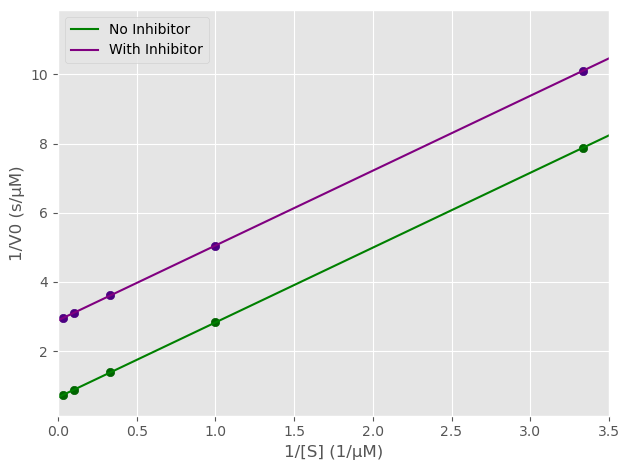

The fitting parameter for no inhibitor is, Vmax: [1.49671818] Km: [3.23590909] Slope Km/Vmax: [2.16200293] 1/Vmax y-int: [0.66812845]
The fitting parameter for with inhibitor is, Vmax: [0.34594755] Km: [0.74822074] Slope Km/Vmax: [2.16281554] 1/Vmax y-int: [2.89061159]


In [15]:
S = np.array([0.3,1,3,10,30])
v0 = np.array([0.127,0.353,0.720,1.132,1.353])
v0_inhib = np.array([0.099,0.198,0.277,0.322,0.337])
S = S[...,None]
v0 = v0[...,None]
v0_inhib = v0_inhib[...,None]


xaxis = 1/S
yaxis = 1/v0
yaxis_inhib = 1/v0_inhib


reg = LinearRegression().fit(xaxis, yaxis)
reginhib = LinearRegression().fit(xaxis, yaxis_inhib)



slope = reg.coef_[0]
y_intercept = reg.intercept_

slope_inhib = reginhib.coef_[0]
y_intercept_inhib = reginhib.intercept_




x = np.arange(0,4,0.1)
plt.style.use("ggplot") 

plt.plot(x, x*slope+y_intercept, label = "No Inhibitor", color = 'green')
plt.scatter(xaxis, yaxis, color = 'darkgreen')
plt.plot(x, x*slope_inhib+y_intercept_inhib, label = "With Inhibitor", color = 'purple')
plt.scatter(xaxis, yaxis_inhib, color = 'indigo')

plt.xlabel("1/[S] (1/µM)")
plt.ylabel("1/V0 (s/µM)")
plt.xlim(0,3.5)

plt.legend(loc = "upper left")

plt.tight_layout()
plt.show()




Vmax = 1/y_intercept
Vmax_inhib = 1/y_intercept_inhib
Km = slope * Vmax
Km_inhib = slope_inhib *Vmax_inhib



print("The fitting parameter for no inhibitor is, Vmax:", Vmax, "Km:", Km, "Slope Km/Vmax:", slope, "1/Vmax y-int:", y_intercept)
print("The fitting parameter for with inhibitor is, Vmax:", Vmax_inhib, "Km:", Km_inhib, "Slope Km/Vmax:", slope_inhib, "1/Vmax y-int:", y_intercept_inhib)